<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Fall2020_Project1_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1

Author: Anonymous <br>
Date: October 20, 2020

#### Problem
How can we predict students' final grades in mathematics and Portuguese language using demographic, academic, and social information?

#### Data Preparation
I read in the data for the mathematics class as math and the Portugese language class as lang. I checked which features contained missing values, which turned out to be only the absences feature for both datasets. Since each had only 6 missing values of several hundred observations, I simply removed the observations with missing values. For the multi-level categorical variables (Mjob, Fjob, reason, and guardian), I created dummy variables for each level.

In [ ]:
import pandas
import numpy

## Import datasets as math (mathematics) and lang (Portugese language)
math = pandas.read_csv('student-mat.csv')
lang = pandas.read_csv('student-por.csv')

In [ ]:
## Print names of columns that have missing values
print(math.isna().any().index[math.isna().any() == True][0])
print(lang.isna().any().index[lang.isna().any() == True][0])

absences
absences


In [ ]:
## For both math and lang, absences is only feature with missing values
## See number of missing values vs total observations
print('math has', math['absences'].isna().sum(), 'missing values of', len(math), 'observations.')
print('lang has', lang['absences'].isna().sum(), 'missing values of', len(lang), 'observations.')

math has 6 missing values of 395 observations.
lang has 6 missing values of 649 observations.


In [ ]:
## 6 observations is relatively small compared to totals of 395 and 649
## Drop observations with missing values
math.dropna(inplace = True)
lang.dropna(inplace = True)
print('math now has', len(math), 'observations.')
print('lang now has', len(lang), 'observations.')

math now has 389 observations.
lang now has 643 observations.


In [ ]:
## Convert binary variables to numeric binary and get dummy variables for multi-level categorical variables
for df in math, lang:
    df.replace(to_replace=['no', 'yes'], value=[0, 1], inplace = True)
    df['school'].replace(to_replace=['GP', 'MS'], value=[0, 1], inplace = True)
    df['sex'].replace(to_replace=['F', 'M'], value=[0, 1], inplace = True)
    df['address'].replace(to_replace=['U', 'R'], value=[0, 1], inplace = True)
    df['famsize'].replace(to_replace=['LE3', 'GT3'], value=[0, 1], inplace = True)
    df['Pstatus'].replace(to_replace=['T', 'A'], value=[0, 1], inplace = True)

math = pandas.get_dummies(math, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])
lang = pandas.get_dummies(lang, columns = ['Mjob', 'Fjob', 'reason', 'guardian'])

#### Metrics
I will be using Mean Squared Error (MSE) and R squared (R2) to evaluate my models. These metrics are appropriate because the goal is to predict G3, a numeric variable, making this problem a regression problem. Thus, it is most appropriate to use regression metrics as opposed to accuracy or a confusion matrix. Additionally, I prefer MSE over MAE since it penalizes more harshly for outliers.

In [ ]:
from sklearn import metrics

#### Baseline Performance
I used two baseline methods: (1) predicting only the mean and (2) predicting only a randomly selected value of G3. I expect about a 0 R-squared value for the first method and slightly less than 0 for the second method. The results ended up yielding slightly negative R-squared values and large MSE values from between 8 and 46, indicating that the baseline performance is a poor predictor of the target.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

predictors = math.columns.drop('G3')
target = 'G3'

## Establish training and testing sets
math_train, math_test, math_train_sln, math_test_sln = \
    train_test_split(math[predictors], math[target], test_size = 0.2, random_state = 41)
lang_train, lang_test, lang_train_sln, lang_test_sln = \
    train_test_split(lang[predictors], lang[target], test_size = 0.2, random_state = 41)

In [ ]:
## First baseline regressor: always predict mean G3
math_dr_mean = DummyRegressor()
math_dr_mean.fit(math_train, math_train_sln)
math_pred = math_dr_mean.predict(math_test)

lang_dr_mean = DummyRegressor()
lang_dr_mean.fit(lang_train, lang_train_sln)
lang_pred = lang_dr_mean.predict(lang_test)

print("Baseline Regressor - Mean")
print("math MSE =", metrics.mean_squared_error(math_test_sln, math_pred))
print("math R2 =", metrics.r2_score(math_test_sln, math_pred))
print("lang MSE =", metrics.mean_squared_error(lang_test_sln, lang_pred))
print("lang R2 =", metrics.r2_score(lang_test_sln, lang_pred))

Baseline Regressor - Mean
math MSE = 19.81995716465997
math R2 = -0.05898601354016253
lang MSE = 8.649495834722659
lang R2 = -0.015237135944163871


In [ ]:
## Second baseline regressor: predict random value from G3
for i in range(1,4):
    guess = math.sample()['G3']
    math_dr_rand = DummyRegressor(strategy = 'constant', constant = guess)
    guess = lang.sample()['G3']
    lang_dr_rand = DummyRegressor(strategy = 'constant', constant = guess)
    
    math_dr_rand.fit(math_train, math_train_sln)
    lang_dr_rand.fit(lang_train, lang_train_sln)

    math_pred = math_dr_rand.predict(math_test)
    lang_pred = lang_dr_rand.predict(lang_test)

    print("Baseline Regressor - Guess Random Value of G3")
    print("math MSE =", metrics.mean_squared_error(math_test_sln, math_pred))
    print("math R2 =", metrics.r2_score(math_test_sln, math_pred))
    print("lang MSE =", metrics.mean_squared_error(lang_test_sln, lang_pred))
    print("lang R2 =", metrics.r2_score(lang_test_sln, lang_pred), "\n")

Baseline Regressor - Guess Random Value of G3
math MSE = 144.84615384615384
math R2 = -6.73917167246285
lang MSE = 14.294573643410853
lang R2 = -0.6778298160478502 

Baseline Regressor - Guess Random Value of G3
math MSE = 64.53846153846153
math R2 = -2.448308567815364
lang MSE = 8.875968992248062
lang R2 = -0.04181948989955986 

Baseline Regressor - Guess Random Value of G3
math MSE = 32.92307692307692
math R2 = -0.7590894720202335
lang MSE = 10.488372093023257
lang R2 = -0.2310757815145017 



#### Model Planning and Execution
The learning algorithms I will try are:<br>
(1) Stochastic Gradient Descent
(2) Random Forest

For SGD, I will tune the number of epochs, and for the random forest, I will first determine the most important features to use, then use those features only when tuning the number of trees, the maximum number of features, and the maximum depth.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

#### Process
The following code and markdowns are the steps I tried in the process of attempting to solve the problem.

1. Normalize the data to minimize any adverse effects of feature scaling

In [ ]:
math_scaler = StandardScaler()
math_scaler.fit(math_train)
math_train_norm = math_scaler.transform(math_train)
math_test_norm = math_scaler.transform(math_test)

2. Fit Stochastic Gradient Descent and print metrics

In [ ]:
math_sgd = SGDRegressor()
math_sgd.fit(math_train_norm, math_train_sln)
math_pred = math_sgd.predict(math_test_norm)

lang_scaler = StandardScaler()
lang_scaler.fit(lang_train)
lang_train_norm = lang_scaler.transform(lang_train)
lang_test_norm = lang_scaler.transform(lang_test)

lang_sgd = SGDRegressor()
lang_sgd.fit(lang_train_norm, lang_train_sln)
lang_pred = lang_sgd.predict(lang_test_norm)

print("SGD Metrics")
print("math MSE =", metrics.mean_squared_error(math_test_sln, math_pred))
print("math R2 =", metrics.r2_score(math_test_sln, math_pred))
print("lang MSE =", metrics.mean_squared_error(lang_test_sln, lang_pred))
print("lang R2 =", metrics.r2_score(lang_test_sln, lang_pred))

SGD Metrics
math MSE = 17.10067940446451
math R2 = 0.08630577952750507
lang MSE = 7.710493414538553
lang R2 = 0.09497855129686217


3. Initial metrics not so great so look at effects of changing epochs

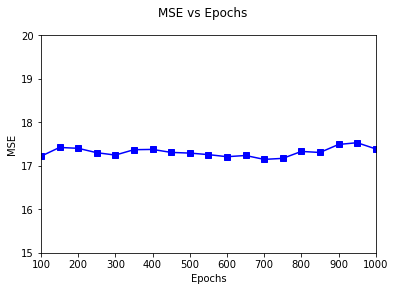

In [ ]:
def SGD_MSE(train, test, train_sln, test_sln, epochs, lr):
    sgd = SGDRegressor(max_iter = epochs, learning_rate = lr)
    sgd.fit(train, train_sln)
    pred = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln, pred)
    return mse

epochs_list = range(100, 1050, 50)
mse = []

for epoch in epochs_list:
    mse.append(SGD_MSE(math_train_norm, math_test_norm, math_train_sln, math_test_sln, epoch, 'invscaling'))

import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs', fontsize = 12)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(epochs_list, mse, 'bs-')
plt.axis([100, 1000, 15, 20])
plt.show()

4. Not much of a difference overall, so SGD wasn't a great predictor. Move onto Random Forest for hopefully better results, starting with defining and fitting a default random forest regressor.

In [ ]:
forest = RandomForestRegressor(random_state = 41)
forest.fit(math_train_norm, math_train_sln)
pred = forest.predict(math_test)
print(metrics.mean_squared_error(math_test_sln, pred))
print(metrics.r2_score(math_test_sln, pred))

18.219173076923077
0.02654434081568169


5. Pretty similar/higher MSE compared to SGD, so start by cutting down on less important features (from 44 features to 10)

In [ ]:
while len(math.columns) > 11:
    
    forest = RandomForestRegressor(random_state = 41, n_estimators = 13, max_features = 10, max_depth = 20)
    forest.fit(math_train_norm, math_train_sln)
    pred = forest.predict(math_test)
    
    #print('MSE =', round(metrics.mean_absolute_error(math_test_sln, pred), 2))
    #print('R2 =', round(metrics.r2_score(math_test_sln, pred), 2))
    #print(forest.feature_importances_)
    
    min_importance = min(forest.feature_importances_)
    min_index = numpy.where(forest.feature_importances_ == min_importance)[0]
    
    if math.columns[min_index][0] == 'G3':
        temp = forest.feature_importances_
        temp[min_index] = max(forest.feature_importances_)
        min_index = numpy.where(temp == min(temp))[0]
    #print('Drop', math.columns[min_index][0])
    math = math.drop(columns = math.columns[min_index][0])
    
    predictors = math.columns.drop('G3')
    target = 'G3'
    math_train, math_test, math_train_sln, math_test_sln = \
    train_test_split(math[predictors], math[target], test_size = 0.2, random_state = 41)
    math_scaler = StandardScaler()
    math_scaler.fit(math_train)
    math_train_norm = math_scaler.transform(math_train)
    math_test_norm = math_scaler.transform(math_test)

In [ ]:
math.columns

Index(['age', 'Medu', 'failures', 'famrel', 'freetime', 'goout', 'Walc',
       'health', 'absences', 'G3', 'guardian_other'],
      dtype='object')

6. Use remaining features (age, mother's education, number of past class failures, quality of family relationships, free time after school, going out with friends, weekend alcohol consumption, health status, number of school absences, and whether student's guardian is neither a mother nor father) in a random forest.

In [ ]:
def forest_MSE(train, test, train_sln, test_sln, n_est, maxfeat, maxdep):
    forest = RandomForestRegressor(random_state = 41, n_estimators = n_est, max_features = maxfeat, max_depth = maxdep)
    forest.fit(train, train_sln)
    pred = forest.predict(test)
    mse = metrics.mean_squared_error(test_sln, pred)
    return mse

7. Look at change in MSE based on number of trees.

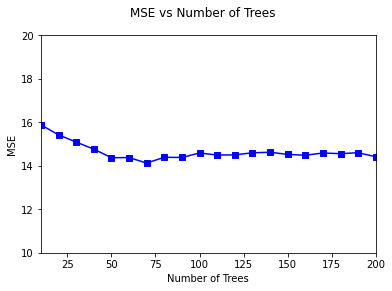

In [ ]:
ntrees = range(10, 210, 10)
mse = []

for n in ntrees:
    mse.append(forest_MSE(math_train_norm, math_test_norm, math_train_sln, math_test_sln, n, 'auto', None))

import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Number of Trees', fontsize = 12)
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.plot(ntrees, mse, 'bs-')
plt.axis([10, 200, 10, 20])
plt.show()

8. Look at change in MSE based on max number of features

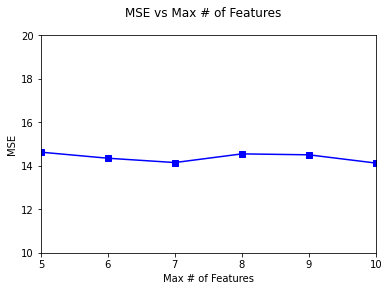

In [ ]:
maxfeats = range(5, 11)
mse = []

for f in maxfeats:
    mse.append(forest_MSE(math_train_norm, math_test_norm, math_train_sln, math_test_sln, 70, f, None))

import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Max # of Features', fontsize = 12)
plt.xlabel('Max # of Features')
plt.ylabel('MSE')
plt.plot(maxfeats, mse, 'bs-')
plt.axis([5, 10, 10, 20])
plt.show()

9. Look at change in MSE based on max depth of the tree.

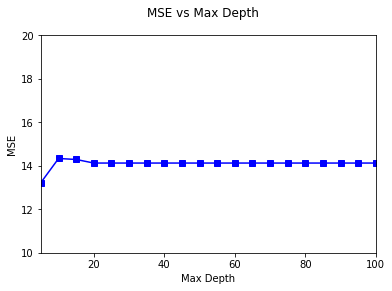

In [ ]:
depths = range(5, 105, 5)
mse = []

for d in depths:
    mse.append(forest_MSE(math_train_norm, math_test_norm, math_train_sln, math_test_sln, 70, 10, d))

import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Max Depth', fontsize = 12)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.plot(depths, mse, 'bs-')
plt.axis([5, 100, 10, 20])
plt.show()

10. Most change was in lowest depths, so look more granuarly at lower depth values.

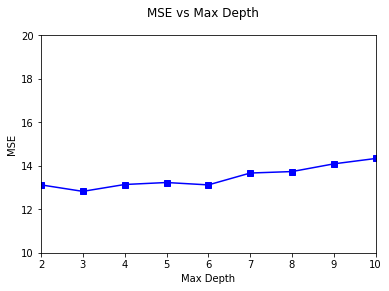

In [ ]:
depths = range(2, 11)
mse = []

for d in depths:
    mse.append(forest_MSE(math_train_norm, math_test_norm, math_train_sln, math_test_sln, 70, 10, d))

import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Max Depth', fontsize = 12)
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.plot(depths, mse, 'bs-')
plt.axis([2, 10, 10, 20])
plt.show()

11. Construct final random forest based on optimal parameters found in earlier steps.

In [ ]:
predictors = math.columns.drop('G3')
target = 'G3'
math_train, math_test, math_train_sln, math_test_sln = \
    train_test_split(math[predictors], math[target], test_size = 0.2, random_state = 41)
math_scaler = StandardScaler()
math_scaler.fit(math_train)
math_train_norm = math_scaler.transform(math_train)
math_test_norm = math_scaler.transform(math_test)

forest_fin = RandomForestRegressor(n_estimators = 70, max_depth = 3, max_features = 10)
forest_fin.fit(math_train_norm, math_train_sln)
pred = forest_fin.predict(math_test_norm)
print("math MSE =", metrics.mean_squared_error(math_test_sln, pred))
print("math R2 =", metrics.r2_score(math_test_sln, pred))

math MSE = 12.824246920831548
math R2 = 0.3147967974642646


12. Construct decision tree (for more interpretability) based on optimal max depth from random forest.

In [ ]:
dt = tree.DecisionTreeRegressor(max_depth = 3)
dt.fit(math_train_norm, math_train_sln)
pred = dt.predict(math_test_norm)
print("math MSE =", metrics.mean_squared_error(math_test_sln, pred))
print("math R2 =", metrics.r2_score(math_test_sln, pred))

math MSE = 14.560281310697215
math R2 = 0.22203998055395868


13. Plot the decision tree.

[Text(465.0, 792.75, 'failures <= 0.216\nmse = 21.35\nsamples = 311\nvalue = 10.18'),
 Text(232.5, 566.25, 'absences <= -0.727\nmse = 18.23\nsamples = 246\nvalue = 10.963'),
 Text(116.25, 339.75, 'goout <= 1.263\nmse = 38.453\nsamples = 72\nvalue = 9.861'),
 Text(58.125, 113.25, 'mse = 35.64\nsamples = 66\nvalue = 10.439'),
 Text(174.375, 113.25, 'mse = 25.25\nsamples = 6\nvalue = 3.5'),
 Text(348.75, 339.75, 'absences <= -0.436\nmse = 9.152\nsamples = 174\nvalue = 11.42'),
 Text(290.625, 113.25, 'mse = 8.738\nsamples = 45\nvalue = 12.467'),
 Text(406.875, 113.25, 'mse = 8.78\nsamples = 129\nvalue = 11.054'),
 Text(697.5, 566.25, 'absences <= -0.654\nmse = 22.046\nsamples = 65\nvalue = 7.215'),
 Text(581.25, 339.75, 'freetime <= -1.734\nmse = 17.648\nsamples = 20\nvalue = 2.05'),
 Text(523.125, 113.25, 'mse = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(639.375, 113.25, 'mse = 15.075\nsamples = 19\nvalue = 1.632'),
 Text(813.75, 339.75, 'Walc <= 0.169\nmse = 6.872\nsamples = 45\nvalue = 9.5

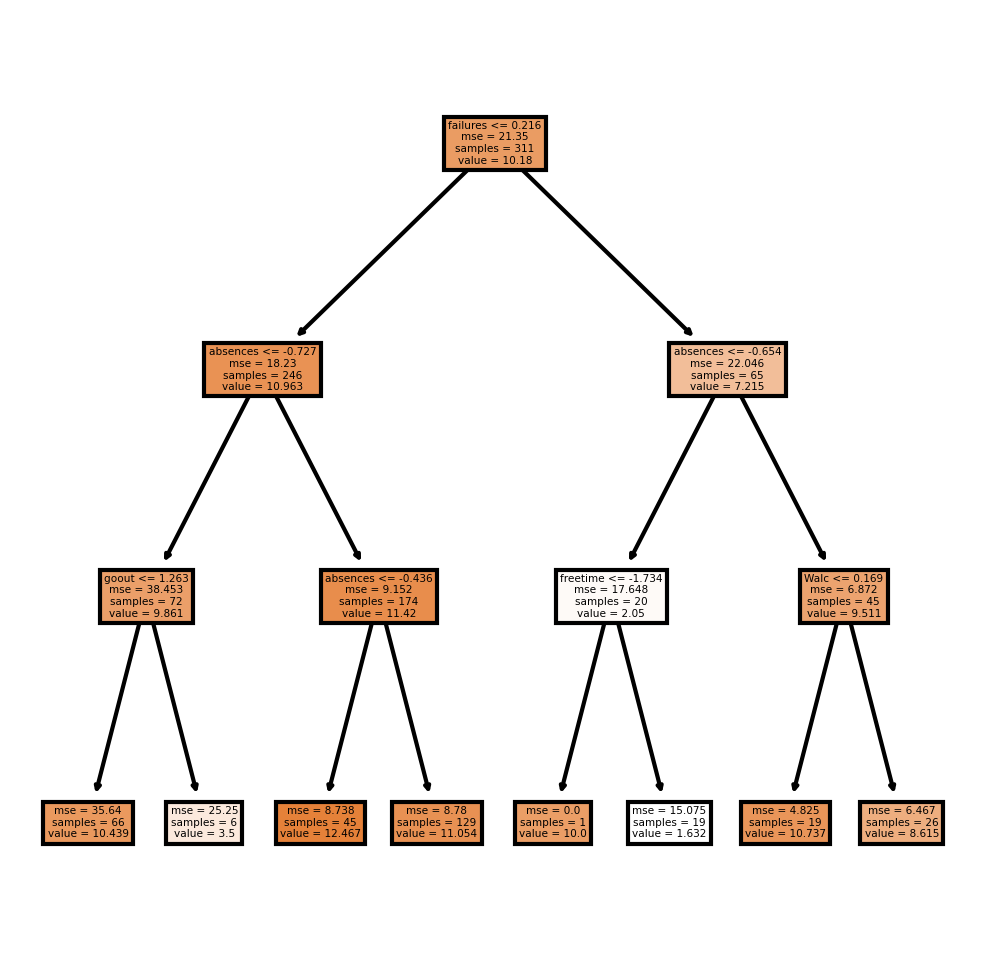

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt, feature_names = math.columns.drop('G3'), filled = True)

14. Replicate final random forest and decision tree for the lang data set.

In [ ]:
lang_train, lang_test, lang_train_sln, lang_test_sln = \
    train_test_split(lang[predictors], lang[target], test_size = 0.2, random_state = 41)
lang_scaler = StandardScaler()
lang_scaler.fit(lang_train)
lang_train_norm = lang_scaler.transform(lang_train)
lang_test_norm = lang_scaler.transform(lang_test)

forest_fin = RandomForestRegressor(n_estimators = 70, max_depth = 3, max_features = 10)
forest_fin.fit(lang_train_norm, lang_train_sln)
pred = forest_fin.predict(lang_test_norm)
print("lang MSE =", metrics.mean_squared_error(lang_test_sln, pred))
print("lang R2 =", metrics.r2_score(lang_test_sln, pred))

lang MSE = 7.753674703178847
lang R2 = 0.08991013475059817


15. Plot the decision tree for lang.

lang MSE = 7.7606209327885525
lang R2 = 0.08909481899239424


[Text(465.0, 792.75, 'age <= 0.445\nmse = 10.846\nsamples = 514\nvalue = 11.957'),
 Text(232.5, 566.25, 'Medu <= 0.968\nmse = 7.977\nsamples = 436\nvalue = 12.606'),
 Text(116.25, 339.75, 'sex <= 0.857\nmse = 7.654\nsamples = 360\nvalue = 12.828'),
 Text(58.125, 113.25, 'mse = 6.051\nsamples = 253\nvalue = 12.534'),
 Text(174.375, 113.25, 'mse = 10.754\nsamples = 107\nvalue = 13.523'),
 Text(348.75, 339.75, 'famsize <= 0.271\nmse = 8.168\nsamples = 76\nvalue = 11.553'),
 Text(290.625, 113.25, 'mse = 6.444\nsamples = 38\nvalue = 12.237'),
 Text(406.875, 113.25, 'mse = 8.956\nsamples = 38\nvalue = 10.868'),
 Text(697.5, 566.25, 'traveltime <= -0.674\nmse = 11.402\nsamples = 78\nvalue = 8.333'),
 Text(581.25, 339.75, 'Medu <= 0.183\nmse = 24.314\nsamples = 26\nvalue = 6.615'),
 Text(523.125, 113.25, 'mse = 15.944\nsamples = 14\nvalue = 8.643'),
 Text(639.375, 113.25, 'mse = 23.688\nsamples = 12\nvalue = 4.25'),
 Text(813.75, 339.75, 'Fedu <= -1.423\nmse = 2.732\nsamples = 52\nvalue = 9.19

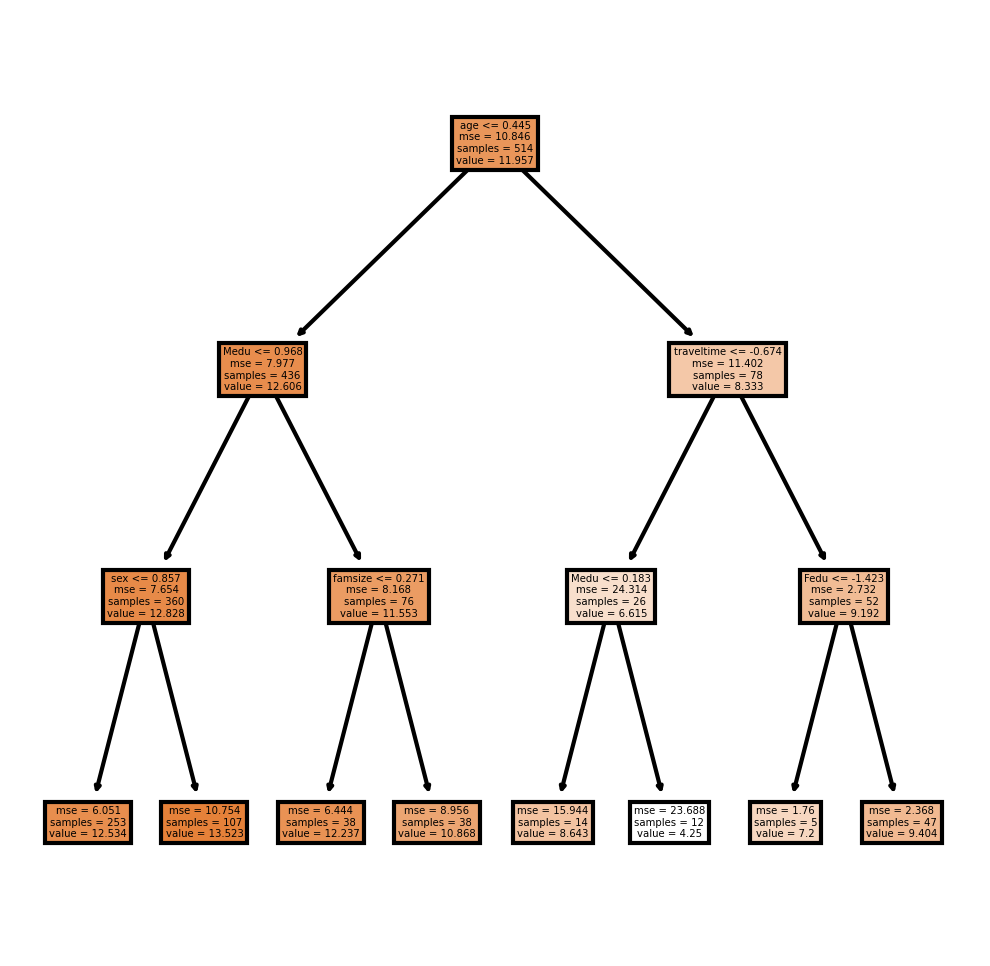

In [ ]:
dt = tree.DecisionTreeRegressor(max_depth = 3)
dt.fit(lang_train_norm, lang_train_sln)
pred = dt.predict(lang_test_norm)
print("lang MSE =", metrics.mean_squared_error(lang_test_sln, pred))
print("lang R2 =", metrics.r2_score(lang_test_sln, pred))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt, feature_names = lang.columns.drop('G3'), filled = True)

#### Process Conclusion
I know that my process is correct because I looked at best-performing algorithms at varying values of each of the parameters and made decisions to drop variables because they were less important to the prediction.

#### Results
Since I am in a point in my education in which I can comfortably adjust more parameters for random forests than SGD, I was able to get results that performed better in terms of the regression metrics for the random forests<br>
<br>
SGD Metrics<br>
math MSE = 17.462<br>
math R2 = 0.067<br>
lang MSE = 7.817<br>
lang R2 = 0.082<br><br>
Random Forest Metrics<br>
math MSE = 13.164<br>
math R2 = 0.297<br>
lang MSE = 7.754<br>
lang R2 = 0.090<br>
<br>
I determined that the options that yielded the lowest MSE were a forest of 70 trees, a maximum depth of 3, and a maximum number of features of 10. (visualized results shown in blue line plots)<br>
Additionally, the features that were the most influential ended up being the number of past class failures, number of school absences, frequency of going out with friends, free time after school, weekend alcohol consumption, age, mother's education, father's education, size of family, home to school travel time, and sex.<br>
Particularly, students tended to have higher performance in classes if they had relatively lower travel time to school, lower weekend alcohol consumption, and had smaller families. The breakdown of the decisions is shown in the plotted decision trees.<br>
<br>
Thus, I recommend that, in order to help students perform, the government should invest in decreasing the functional distance between homes and schools by creating affordable residential areas where schools are. They could also invest in education about alcohol and related subjects (drug use, sex education, general bodily health) to possibly bring family sizes and alcohol consumption down.

#### Insights
Since there were many variables that didn't end up having strong effects on the model, I think it may be helpful to look into interactions between variables since, though they are not as powerful on their own, they could have an impact on the final prediction if they were combined as an interaction term. I was also only able to get the math R-squared to 0.3 and the lang R-squared to under 0.01, so there is still a large amount of unexplained variablility even with these variables. Thus, I think that it would be worthwile to look into the variables individually and also investigate different types of data that aren't listed in this dataset, like household income or personality metrics. Overall, it seems like a smaller number of features tended to predict better, so I would say that the next step is finding out the underlying force that drives performance through observational studies or experiments instead of throwing all of the information at an algorithm to make a prediction.